In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('data/dengue_features_train.csv')
test = pd.read_csv('data/dengue_features_test.csv')
train_labels = pd.read_csv('data/dengue_labels_train.csv')
submission_data = pd.read_csv('data/submission_format.csv')

### Pre-processing

In [3]:
train_dengue = pd.merge(train,train_labels,on=['city','year','weekofyear'])

In [4]:
train_dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
train_dengue.drop(['city','year','week_start_date'],axis=1,inplace=True)

In [6]:
train_dengue.isna().sum()

weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
total_cases                                0
dtype: int

In [7]:
train_dengue.dropna(inplace=True)

In [8]:
train_dengue.isna().sum()

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int64

In [9]:
train_dengue.shape

(1199, 22)

In [10]:
# Splitting into training and test set
X = train_dengue.drop(['total_cases'],axis=1)
y = train_dengue['total_cases']

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
X[:5]

array([[-0.5706752 , -0.12220735, -0.25384606, -0.09513954, -0.32850181,
        -0.81459795, -0.80819827, -1.19014636, -1.92630373, -1.17108477,
         0.12208647, -0.21473304, -1.2696812 , -0.81459795, -1.84223571,
        -0.69824385, -1.40926221, -0.61964303, -1.62579955, -1.33694106,
        -0.50873538],
       [-0.50351387,  0.21551343,  0.06473244, -0.58053566, -0.58730745,
        -0.57364016, -0.34008972, -0.63498065, -0.90146235, -0.8374684 ,
         0.31520213, -0.53091408, -0.72125747, -0.57364016, -0.94640628,
        -0.76983121, -0.40589318, -0.86266432, -0.4458776 ,  0.08021109,
        -0.65982966],
       [-0.43635255, -0.76730404,  0.3198579 , -0.6498271 , -0.40771638,
        -0.30209926,  0.07775214, -0.28941831,  0.08718576, -0.95878345,
         0.66281032, -0.34741214, -0.07947252, -0.30209926,  0.02564394,
        -0.78971659, -0.40589318, -0.81011918, -0.18937283,  0.46670713,
         0.00988552],
       [-0.36919123, -0.07912975,  0.91724437,  0.29549965

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.3, random_state=42,
                                                                           shuffle=False)

In [15]:
# Random model
y_p = np.full(len(y_test), np.mean(y_train))
mean_absolute_error(y_test, y_p)

19.77737054694742

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [17]:
mean_absolute_error(y_test,y_pred)

11.800439201386007

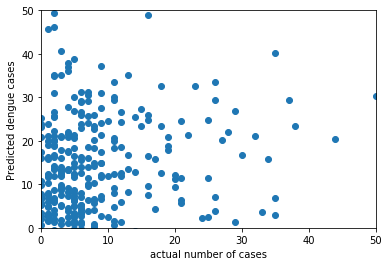

In [18]:
plt.scatter(y_test, y_pred)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

### L1 - Lasso regression

In [19]:
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
mean_absolute_error(y_test,lasso_pred)

9.589157888733912

### L2 - Ridge regression

In [30]:
ridge = linear_model.Ridge(alpha=45)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
mean_absolute_error(y_test,ridge_pred)

9.453151174325207

In [21]:
# testing with actual data set
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [22]:
test.drop(['city','year','week_start_date'],axis=1,inplace=True)

In [23]:
test.fillna(0,inplace=True)

In [24]:
test.isna().sum()

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 21 columns):
weekofyear                               416 non-null int64
ndvi_ne                                  416 non-null float64
ndvi_nw                                  416 non-null float64
ndvi_se                                  416 non-null float64
ndvi_sw                                  416 non-null float64
precipitation_amt_mm                     416 non-null float64
reanalysis_air_temp_k                    416 non-null float64
reanalysis_avg_temp_k                    416 non-null float64
reanalysis_dew_point_temp_k              416 non-null float64
reanalysis_max_air_temp_k                416 non-null float64
reanalysis_min_air_temp_k                416 non-null float64
reanalysis_precip_amt_kg_per_m2          416 non-null float64
reanalysis_relative_humidity_percent     416 non-null float64
reanalysis_sat_precip_amt_mm             416 non-null float64
reanalysis_specific_humidity_

In [26]:
tx = sc.fit_transform(test)

/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/suniljacob/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
final_sub = ridge.predict(tx)

In [28]:
final_sub[:5]
final_sub = final_sub.astype('int64')
final_sub[:5]

array([17, 21, 20, 20, 21])

In [29]:
submission_data.total_cases = final_sub
submission_data.to_csv('ridge_sub_sc.csv',index=None,header=True)
submission_data.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,17
1,sj,2008,19,21
2,sj,2008,20,20
3,sj,2008,21,20
4,sj,2008,22,21
